# MLZ week 2 session

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [3]:
filename = "cars_data.csv"

if not os.path.exists(filename):
    urllib.request.urlretrieve(data_url, filename)

In [4]:
df = pd.read_csv(filename)

## Data prep section

In [5]:
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
df.dtypes == "object"

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [9]:
df.dtypes[df.dtypes == "object"]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [10]:
type(df.dtypes[df.dtypes == "object"])

pandas.core.series.Series

In [11]:
df.dtypes[df.dtypes == "object"].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [12]:
string_columns = df.dtypes[df.dtypes == "object"].index

In [13]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [14]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


## EDA section

In [15]:
len(df)

11914

In [16]:
for c in df.columns:
    print(c)
    print(f"total unique values: {len(df[c].unique())}")
    print("example uniques: ", df[c].unique()[:3])
    print()

make
total unique values: 48
example uniques:  ['bmw' 'audi' 'fiat']

model
total unique values: 914
example uniques:  ['1_series_m' '1_series' '100']

year
total unique values: 28
example uniques:  [2011 2012 2013]

engine_fuel_type
total unique values: 11
example uniques:  ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)']

engine_hp
total unique values: 357
example uniques:  [335. 300. 230.]

engine_cylinders
total unique values: 10
example uniques:  [6. 4. 5.]

transmission_type
total unique values: 5
example uniques:  ['manual' 'automatic' 'automated_manual']

driven_wheels
total unique values: 4
example uniques:  ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive']

number_of_doors
total unique values: 4
example uniques:  [2. 4. 3.]

market_category
total unique values: 72
example uniques:  ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance']

vehicle_size
total unique values: 3
example uniques:  ['compa

<Axes: xlabel='msrp', ylabel='Count'>

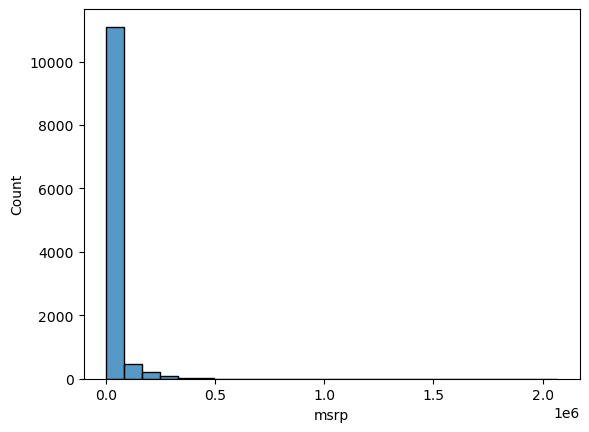

In [17]:
sns.histplot(df.msrp, bins=25)

<Axes: xlabel='msrp', ylabel='Count'>

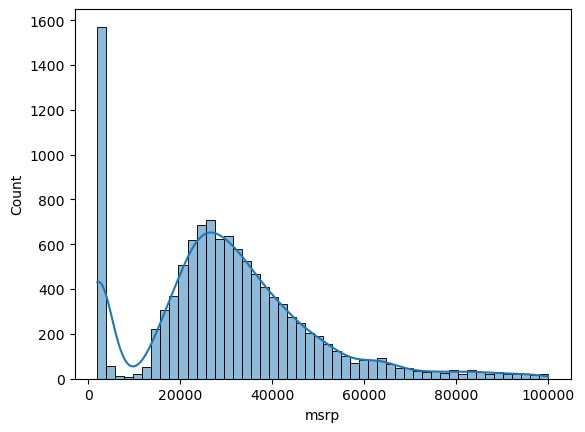

In [18]:
# drop long tails

sns.histplot(df.msrp[df.msrp < 100000], bins=50, kde=True)

<Axes: xlabel='msrp', ylabel='Count'>

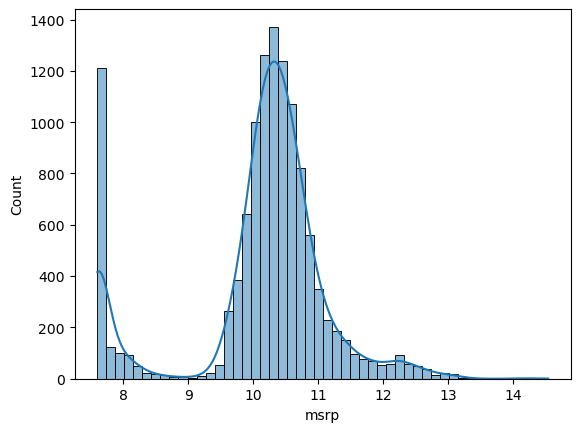

In [19]:
# long conversion to scale out tails

price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50, kde=True)

In [20]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [21]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Validation framework

In [22]:
m = len(df)
m_val = int(m * 0.2)
m_test = int(m * 0.2)
m_train = m - m_val - m_test
print(m, m_train, m_val, m_test)

11914 7150 2382 2382


In [23]:
df = df.sample(frac=1)

df_train = df.iloc[:m_train]
df_val = df.iloc[m_train:m_train+m_val]
df_test = df.iloc[m_train+m_val:]

assert (len(df_train) + len(df_val) + len(df_test)) == m

df_train.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8005,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,29,22,873,15600
3066,honda,cr-v,2016,regular_unleaded,185.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,31,25,2202,33395
3494,dodge,dart,2016,regular_unleaded,160.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,39,27,1851,19495
25,audi,100,1993,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
7317,kia,optima,2014,regular_unleaded,192.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,34,23,1720,25500
9306,gmc,sierra_1500_hybrid,2012,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,hybrid,large,crew_cab_pickup,23,20,549,46790
6296,buick,lacrosse,2015,regular_unleaded,182.0,4.0,automatic,front_wheel_drive,4.0,"flex_fuel,hybrid",large,sedan,36,25,155,35725
7303,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,42305
11684,suzuki,xl-7,2006,regular_unleaded,185.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,15,481,23199
2934,toyota,corolla,2015,regular_unleaded,140.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,40,30,2031,22725


In [24]:
# alternative shuffle - deterministic

idx = np.arange(m)
np.random.seed(1)
np.random.shuffle(idx)

df_train = df.iloc[idx[:m_train]]
df_val = df.iloc[idx[m_train:m_train+m_val]]
df_test = df.iloc[idx[m_train+m_val:]]

assert (len(df_train) + len(df_val) + len(df_test)) == m

df_train.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2619,chevrolet,c/k_1500_series,1997,regular_unleaded,230.0,8.0,manual,four_wheel_drive,2.0,NaN,large,extended_cab_pickup,17,11,1385,3046
10459,nissan,titan,2017,regular_unleaded,390.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,21,15,2009,37810
8113,dodge,ram_50_pickup,1991,regular_unleaded,116.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,regular_cab_pickup,22,17,1851,2000
5781,infiniti,i30,1999,regular_unleaded,190.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,25,18,190,2288
10598,chevrolet,trailblazer_ext,2004,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,1385,30070
6434,buick,lesabre,2005,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,18,155,26725
10677,ford,transit_connect,2017,flex-fuel_(unleaded/e85),169.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,passenger_minivan,27,19,5657,27590
8424,acura,rdx,2016,premium_unleaded_(recommended),279.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,28,19,204,41870
6947,pontiac,montana,2003,regular_unleaded,185.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,passenger_minivan,24,17,210,26140
10126,suzuki,sx4,2011,regular_unleaded,148.0,4.0,automatic,front_wheel_drive,4.0,"crossover,hatchback",compact,4dr_hatchback,30,23,481,17799


In [25]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

df_train.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2619,chevrolet,c/k_1500_series,1997,regular_unleaded,230.0,8.0,manual,four_wheel_drive,2.0,NaN,large,extended_cab_pickup,17,11,1385
10459,nissan,titan,2017,regular_unleaded,390.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,21,15,2009
8113,dodge,ram_50_pickup,1991,regular_unleaded,116.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,regular_cab_pickup,22,17,1851
5781,infiniti,i30,1999,regular_unleaded,190.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,25,18,190
10598,chevrolet,trailblazer_ext,2004,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,1385
6434,buick,lesabre,2005,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,18,155
10677,ford,transit_connect,2017,flex-fuel_(unleaded/e85),169.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,passenger_minivan,27,19,5657
8424,acura,rdx,2016,premium_unleaded_(recommended),279.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,28,19,204
6947,pontiac,montana,2003,regular_unleaded,185.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,passenger_minivan,24,17,210
10126,suzuki,sx4,2011,regular_unleaded,148.0,4.0,automatic,front_wheel_drive,4.0,"crossover,hatchback",compact,4dr_hatchback,30,23,481


In [26]:
y_train[:10]

array([ 8.02191278, 10.54035534,  7.60140233,  7.73587032, 10.31131653,
       10.19339215, 10.22524491, 10.64234874, 10.17126024,  9.78695374])

## Regression

In [27]:
example = df_train.iloc[15]
example_label = y_train[15]
example

make                                cadillac
model                                    cts
year                                    2017
engine_fuel_type            regular_unleaded
engine_hp                              335.0
engine_cylinders                         6.0
transmission_type                  automatic
driven_wheels               rear_wheel_drive
number_of_doors                          4.0
market_category      luxury,high-performance
vehicle_size                           large
vehicle_style                          sedan
highway_mpg                               30
city_mpg                                  20
popularity                              1624
Name: 3280, dtype: object

In [28]:
xi = [
    example.engine_hp,
    example.city_mpg,
    example.popularity
]

xi

[np.float64(335.0), np.int64(20), np.int64(1624)]

In [29]:
def g(xi):
    n = len(xi)
    w0 = 10
    w = [0.002 ,0.002, 0.002]

    pred = w0
    for j in range(n):
        pred += xi[j] * w[j]
    return pred

In [30]:
y_hat_i = g(xi)

print(y_hat_i)
print(np.expm1(y_hat_i).round(2), np.expm1(example_label).round(2))


13.957999999999998
1153139.91 59195.0


## Vectorized

In [31]:
X = df_train[["engine_hp", "city_mpg", "popularity"]].values[:5]
X = np.hstack([np.ones((X.shape[0], 1)), X])

y = y_train[:5]

W = np.array([10, 0.002, 0.002, 0.002])

y_hat = X.dot(W)
print(y_hat.round(2))
print(y.round(2))

[13.25 14.83 13.97 10.8  13.35]
[ 8.02 10.54  7.6   7.74 10.31]


## Normal equation

In [32]:
# XTXw = XTy
# IW = XTX-1XTy

X = df_train[["engine_hp", "city_mpg", "popularity"]].values[:5]
X = np.hstack([np.ones((X.shape[0], 1)), X])

y = y_train[:5]

def train_reg(X, y):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w

w = train_reg(X, y)

print(w)

y_hat = X.dot(w)
print(y_hat.round(2))
print(y.round(2))

[5.23577215e+00 1.19355295e-02 1.77632177e-02 3.49405803e-04]
[ 8.66 10.86  7.57  7.89  9.23]
[ 8.02 10.54  7.6   7.74 10.31]


## Baseline model

In [33]:
df_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2619,chevrolet,c/k_1500_series,1997,regular_unleaded,230.0,8.0,manual,four_wheel_drive,2.0,NaN,large,extended_cab_pickup,17,11,1385
10459,nissan,titan,2017,regular_unleaded,390.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,21,15,2009


In [34]:
df_train.dtypes # extract numerical columns first

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [35]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [36]:
base_features = [
    "engine_hp",
    "engine_cylinders",
    "highway_mpg",
    "city_mpg",
    "popularity"
]

df_train[base_features].head(2)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2619,230.0,8.0,17,11,1385
10459,390.0,8.0,21,15,2009


In [37]:
X_train = df_train[base_features].values
X_train[:5]

array([[ 230.,    8.,   17.,   11., 1385.],
       [ 390.,    8.,   21.,   15., 2009.],
       [ 116.,    4.,   22.,   17., 1851.],
       [ 190.,    6.,   25.,   18.,  190.],
       [ 275.,    6.,   18.,   13., 1385.]])

In [38]:
w = train_reg(X_train, y_train)
w # error - missing values

array([nan, nan, nan, nan, nan])

In [39]:
df_train.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              43
engine_cylinders       18
transmission_type       0
driven_wheels           0
number_of_doors         3
market_category      2210
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
dtype: int64

In [40]:

X_train = df_train[base_features].fillna(0, inplace=False).values
X_train[:5]

array([[ 230.,    8.,   17.,   11., 1385.],
       [ 390.,    8.,   21.,   15., 2009.],
       [ 116.,    4.,   22.,   17., 1851.],
       [ 190.,    6.,   25.,   18.,  190.],
       [ 275.,    6.,   18.,   13., 1385.]])

In [41]:
w = train_reg(X_train, y_train)
w

array([7.21886673e-03, 6.57587075e-01, 1.36667073e-01, 3.43177928e-02,
       8.64392628e-05])

In [42]:
y_hat_train = X_train.dot(w)
print(y_hat_train)
print(y_train)
print(len(y_hat_train), len(y_train))
print(y_hat_train.max(), y_train.max())

[ 9.74159029 11.63448653  7.217814   ...  8.7800502   9.35041178
  9.83178807]
[ 8.02191278 10.54035534  7.60140233 ... 10.01663765  8.48218758
 10.15525743]
7150 7150
53.92166750632157 14.54107797693027


<Axes: ylabel='Count'>

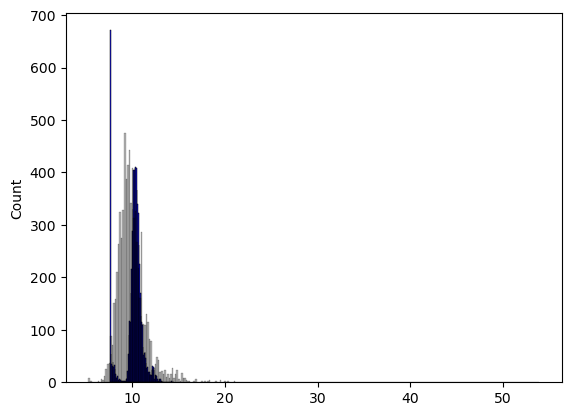

In [43]:
sns.histplot(y_train, color='blue', alpha=0.9)
sns.histplot(y_hat_train, color='black', alpha=0.3)

## RMSE

In [44]:
def rmse(y, y_hat):
    error = y - y_hat
    sq_error = error ** 2
    mse = sq_error.mean()
    return np.sqrt(mse)

In [45]:
err = rmse(y_train, y_hat_train)
err.item()

1.3744969076508726

## Validation

In [46]:
def prepare_X(df):
    df_num = df[base_features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [47]:
X_train = prepare_X(df_train)
y_train = y_train

X_val = prepare_X(df_val)
y_val = y_val

w = train_reg(X_train, y_train)

y_pred_train = X_train.dot(w)
y_pred_val = X_val.dot(w)

train_err = rmse(y_train, y_pred_train)
val_err = rmse(y_val, y_pred_val)

print(train_err.round(2), val_err.round(2))

1.37 1.24


## Feature engineering

In [48]:
df_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2619,chevrolet,c/k_1500_series,1997,regular_unleaded,230.0,8.0,manual,four_wheel_drive,2.0,NaN,large,extended_cab_pickup,17,11,1385
10459,nissan,titan,2017,regular_unleaded,390.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,21,15,2009


In [49]:
print(base_features) # what features are currently used

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']


In [50]:
max_year = df_train.year.max().item()
max_year

2017

In [51]:
2017 - df.year

8005      9
3066      1
3494      1
25       24
7317      3
         ..
6516     27
684       6
7288     26
10804     8
1838      2
Name: year, Length: 11914, dtype: int64

In [52]:
def prepare_X(df):
    df = df.copy()
    df["age"] = 2017 - df.year
    features = base_features.copy() + ["age"]
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [53]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
X_test = prepare_X(df_test)

w = train_reg(X_train, y_train)

y_pred_train = X_train.dot(w)
y_pred_val = X_val.dot(w)

train_err = rmse(y_train, y_pred_train)
val_err = rmse(y_val, y_pred_val)

print(train_err.round(2), val_err.round(2))

1.37 1.23


## Categorical vars

In [54]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [55]:
df_train.number_of_doors == 2

2619      True
10459    False
8113      True
5781     False
10598    False
         ...  
1425     False
2677      True
3127     False
9412     False
1251      True
Name: number_of_doors, Length: 7150, dtype: bool

In [56]:
(df_train.number_of_doors == 2).astype(int)

2619     1
10459    0
8113     1
5781     0
10598    0
        ..
1425     0
2677     1
3127     0
9412     0
1251     1
Name: number_of_doors, Length: 7150, dtype: int64

In [57]:
for v in [2, 3, 4]:
    df_train[f"num_doors_{v}"] = (df_train.number_of_doors == v).astype(int)
    df_val[f"num_doors_{v}"] = (df_val.number_of_doors == v).astype(int)
    df_test[f"num_doors_{v}"] = (df_test.number_of_doors == v).astype(int)

df_train.head(2)

/var/folders/vv/1rb9wx295jlgbn122t666s5h0000gn/T/ipykernel_42876/1645325927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[f"num_doors_{v}"] = (df_train.number_of_doors == v).astype(int)
/var/folders/vv/1rb9wx295jlgbn122t666s5h0000gn/T/ipykernel_42876/1645325927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[f"num_doors_{v}"] = (df_val.number_of_doors == v).astype(int)
/var/folders/vv/1rb9wx295jlgbn122t666s5h0000gn/T/ipykernel_42876/1645325927.py:4: SettingWithCopyWarning: 
A value

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
2619,chevrolet,c/k_1500_series,1997,regular_unleaded,230.0,8.0,manual,four_wheel_drive,2.0,NaN,large,extended_cab_pickup,17,11,1385,1,0,0
10459,nissan,titan,2017,regular_unleaded,390.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,21,15,2009,0,0,1


In [58]:
df.make.value_counts().head(10)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
gmc            515
honda          449
mazda          423
cadillac       397
Name: count, dtype: int64

In [62]:
makes = list(df.make.value_counts().index)
makes[:5]

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']